In [1]:
import pandas as pd
import numpy as np

import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns


from utils import read_product_delivery

In [2]:
df = read_product_delivery()
df.head()

,order_id,product_id,quantity,seller_id,price,freight_value,product_category_name,order_purchase_timestamp,delivered_carrier_time,carrier_to_customer_time,total_delivery_time
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,1,48436dade18ac8b2bce089ec2a041202,58.90,13.29,cool_stuff,2017-09-13 08:59:02,6 days 09:35:14,1 days 05:09:32,7 days 14:44:46
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,1,dd7ddc04e1b6c2c614352b383efe2d36,239.90,19.93,pet_shop,2017-04-26 10:53:06,8 days 03:41:54,8 days 01:29:24,16 days 05:11:18
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,1,5b51032eddd242adc84c38acab88f23d,199.00,17.87,moveis_decoracao,2018-01-14 14:33:31,1 days 22:03:17,6 days 00:42:28,7 days 22:45:45
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,1,9d7a1d34a5052409006425275ba1c2b4,12.99,12.79,perfumaria,2018-08-08 10:00:35,2 days 03:27:25,4 days 00:04:39,6 days 03:32:04
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,1,df560393f3a51e74553ab94004ba5c87,199.90,18.14,ferramentas_jardim,2017-02-04 13:57:51,11 days 19:48:18,13 days 06:56:22,25 days 02:44:40


In [3]:
columns = ['freight_value', 'total_delivery_time']
df = df[columns]

In [4]:
df.describe()

,freight_value,total_delivery_time
count,99962.000000,99962
mean,20.068163,12 days 12:11:31.852664012
std,15.782837,9 days 12:44:16.690568991
min,0.000000,0 days 12:48:07
25%,13.140000,6 days 17:49:19.250000
50%,16.320000,10 days 04:30:19.500000
75%,21.190000,15 days 14:45:10
max,409.680000,209 days 15:05:12


In [5]:
df['delivery_days'] = df['total_delivery_time'].dt.days

In [7]:
lower_bound = df['freight_value'].quantile(0.25)
upper_bound = df['freight_value'].quantile(0.75)

conditions = [
        df['freight_value'] < lower_bound,
        df['freight_value'] > upper_bound
    ]
choices = ["Light", "Heavy"]
df['category'] = np.select(conditions, choices, default="Normal")

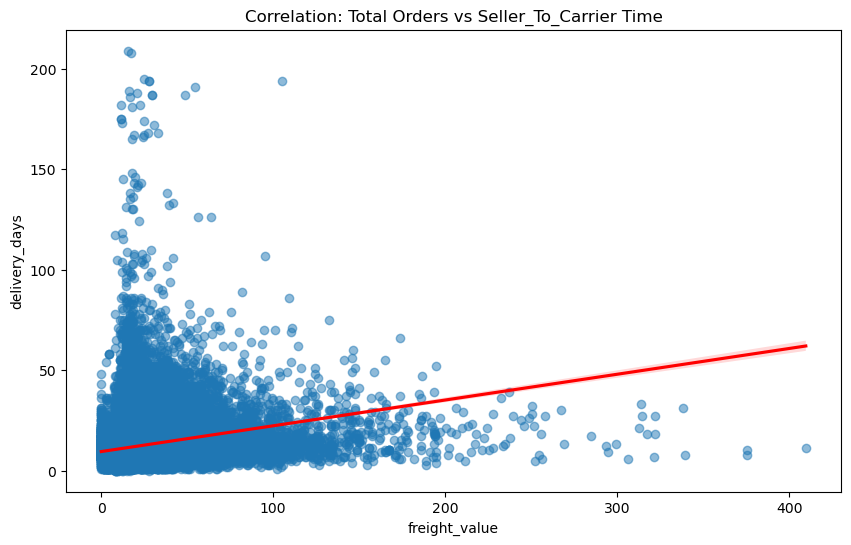

In [8]:
plt.figure(figsize=(10, 6))

sns.regplot(
    data=df, 
    x='freight_value', 
    y='delivery_days',
    scatter_kws={'alpha':0.5}, # Makes points semi-transparent
    line_kws={'color':'red'}    # Sets the regression line color
)

plt.title("Correlation: Total Orders vs Seller_To_Carrier Time")
plt.show()

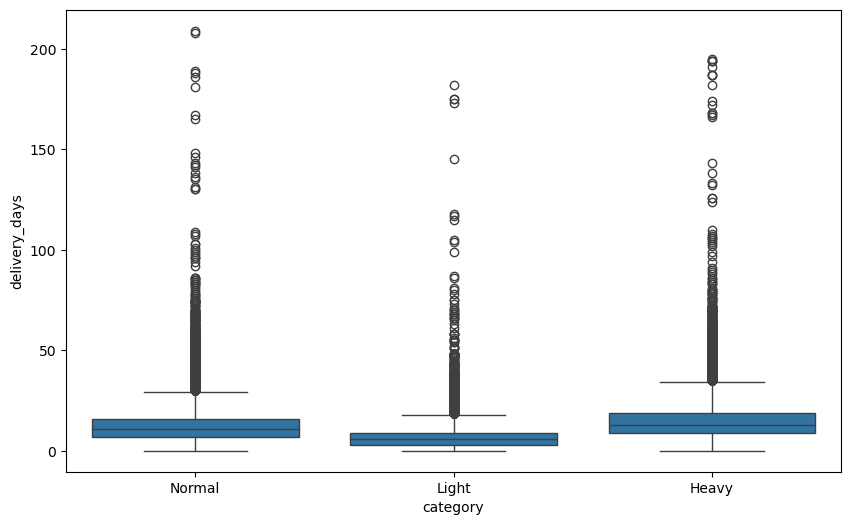

In [9]:
fig, ax = plt.subplots(figsize=(10, 6)) #

sns.boxplot(x='category',  y='delivery_days', data=df, ax = ax)
plt.show()

#### Finding
longer delivery time are correlated with freight_value.
the larger the freight_value is, the customer tends to experience longer delivery time.

In [15]:
cat = ["Light", "Normal", "Heavy"]
for c in cat:
    condition = df['category'] == c
    
    days_90 = df[condition]['delivery_days'].quantile(0.90)
    days_75 = df[condition]['delivery_days'].quantile(0.75)
    days_25 = df[condition]['delivery_days'].quantile(0.25)
    
    print(f"{c} finished 90% of deliveries in {days_90} days, 25% in {days_25} days.")

Light finished 90% of deliveries in 14.0 days, 25% in 3.0 days.
Normal finished 90% of deliveries in 23.0 days, 25% in 7.0 days.
Heavy finished 90% of deliveries in 28.0 days, 25% in 9.0 days.
